# Density of States


In [1]:
#Librerias
import archimedes as ach
#import matplotlib.pyplot as plt
import pylab as plt
import scipy.interpolate as interpolate
import numpy as np
from scipy.integrate import simps
from scipy import interpolate 
from filon import cos_integral


In [37]:
nc0 = 5 # cicles number
ns0 = 20   # Subdivisiones en el intervalo de phi h
NP0 = 1000  # número de subsubintervalos para integrar
a0 = 2.0 
b0 = 2.0 
Long_arc_0,phi_0=  ach.Arc_Lenght(ns0,nc0,NP0,a0,b0)
sf_0 = Long_arc_0[-1]

Nelectron=501

theta_0 = 0 
F_grid_0 =   np.array([ 0.5 ]) #np.linspace(0, 2.0, 50)
camp_F_0 = ach.CAMP(F_grid_0)
#---------------------------------------------------------------------------------------------------------------
SD_grid_0 =  np.array([ach.ssfi(1.5*np.pi,Long_arc_0,phi_0),ach.ssfi(4*np.pi,Long_arc_0,phi_0),ach.ssfi(6*np.pi,Long_arc_0,phi_0),ach.ssfi(8*np.pi,Long_arc_0,phi_0)])#0.2*sf_0, 0.4*sf_0, 0.8*sf_0 ]) 
#---------------------------------------------------------------------------------------------------------------
VS_0,kindex_0,SE_grid_0,SD_SF_0,Ndonor_0,phie_0,NF_0 =  ach.int_vpot(sf_0,Nelectron,SD_grid_0,camp_F_0,theta_0,a0,b0,Long_arc_0,phi_0)
COEF_0= ach.coef(VS_0,kindex_0,sf_0,NF_0,Nelectron,Ndonor_0)
Ee_0,VecR_0,ND =  ach.schr(COEF_0,sf_0,NF_0,Nelectron,Ndonor_0)
X_0,F_0 = ach.DOS(0.03,Ee_0,Ndonor_0,NF_0,ND,200)

In [38]:
SD_SF_0

array([0.05925534, 0.22906796, 0.42901721, 0.68598886])

In [74]:
nc1 = 5 # cicles number
ns1 = 20   # Subdivisiones en el intervalo de phi h
NP1 = 1000  # número de subsubintervalos para integrar
a1 = 2.0 
b1 = 2.0 
Long_arc_1,phi_1=  ach.Arc_Lenght(ns1,nc1,NP1,a1,b1)
sf_1 = Long_arc_1[-1]

Nelectron=501

theta_1 = 0 
F_grid_1 =   np.array([1.0 ]) #np.linspace(0, 2.0, 50)
camp_F_1 = ach.CAMP(F_grid_1)
#---------------------------------------------------------------------------------------------------------------
SD_grid_1 =  np.array([ach.ssfi(1.5*np.pi,Long_arc_1,phi_1),ach.ssfi(4*np.pi,Long_arc_1,phi_1),ach.ssfi(6*np.pi,Long_arc_1,phi_1),ach.ssfi(8*np.pi,Long_arc_1,phi_1)]) # ,ach.ssfi(4*np.pi,Long_arc_0,phi_0),ach.ssfi(5*np.pi,Long_arc_0,phi_0)])#0.2*sf_0, 0.4*sf_0, 0.8*sf_0 ]) 
#---------------------------------------------------------------------------------------------------------------
VS_1,kindex_1,SE_grid_1,SD_SF_1,Ndonor_1,phie_1,NF_1 =  ach.int_vpot(sf_1,Nelectron,SD_grid_1,camp_F_1,theta_1,a1,b1,Long_arc_1,phi_1)
COEF_1= ach.coef(VS_1,kindex_1,sf_1,NF_1,Nelectron,Ndonor_1)
Ee_1,VecR_1,ND =  ach.schr(COEF_1,sf_1,NF_1,Nelectron,Ndonor_1)
X_1,F_1 = ach.DOS(0.03,Ee_1,Ndonor_1,NF_1,ND,200)

In [75]:
SD_SF_0,SD_SF_1

(array([0.05925534, 0.22906796, 0.42901721, 0.68598886]),
 array([0.05925534, 0.22906796, 0.42901721, 0.68598886]))

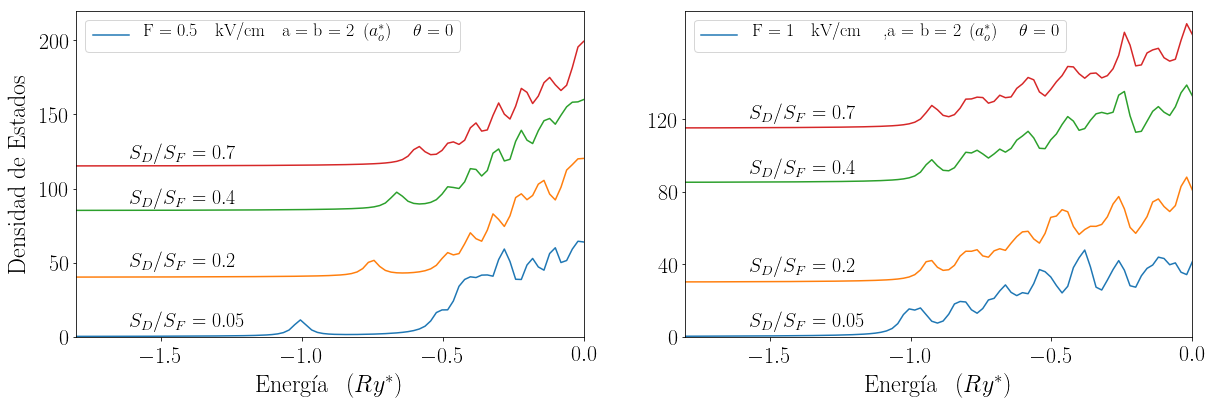

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(20,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax1.plot( X_0, F_0[:,0,0], X_0,F_0[:,1,0] + 40, X_0,F_0[:,2,0] + 85, X_0,F_0[:,3,0] + 115 ) 
ax2.plot( X_1, F_1[:,0,0], X_1,F_1[:,1,0] + 30, X_1,F_1[:,2,0] + 85, X_1,F_1[:,3,0] + 115 ) 

plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 


ax1.set_ylim(0,220)
ax2.set_ylim(0,180)

ax1.set_xlim(-1.8,0)
ax2.set_xlim(-1.8,0)


ax2.yaxis.set_ticks(np.arange(0.0,150, 40))


ax1.set_xlabel(r'Energ\'ia ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')
ax2.set_xlabel(r'Energ\'ia ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')

ax1.annotate('$S_D/S_F = 0.05$ \,\,', xy=(130, 75), xycoords='figure points',fontsize=20)
ax1.annotate('$S_D/S_F = 0.2 $\,\, ', xy=(130, 135), xycoords='figure points',fontsize=20)
ax1.annotate('$S_D/S_F = 0.4 $\,\, ', xy=(130, 198), xycoords='figure points',fontsize=20)
ax1.annotate('$S_D/S_F = 0.7$ \,\, ', xy=(130, 243), xycoords='figure points',fontsize=20)

ax2.annotate('$S_D/S_F = 0.05$ \,\,', xy=(750, 75), xycoords='figure points',fontsize=20)
ax2.annotate('$S_D/S_F = 0.2 $\,\, ', xy=(750, 130), xycoords='figure points',fontsize=20)
ax2.annotate('$S_D/S_F = 0.4 $\,\, ', xy=(750, 228), xycoords='figure points',fontsize=20)
ax2.annotate('$S_D/S_F = 0.7$ \,\, ', xy=(750, 283), xycoords='figure points',fontsize=20)


ax1.legend(["F = 0.5 \,\, kV/cm \, \,a = b = 2 \,($a_o^*$)  \quad $\\theta= 0$"], loc=(2),fontsize=18)
ax2.legend(["F = 1 \,\, kV/cm  \, \,  ,a = b = 2 \,($a_o^*$) \quad $\\theta= 0$"], loc=(2),fontsize=18)

ax2.set_xlabel(r'Energ\'ia \, ($Ry^*$)' , labelpad=8,fontsize=24,fontweight='bold', horizontalalignment='center')           
ax1.set_xlabel(r'Energ\'ia \, ($Ry^*$)' , labelpad=8,fontsize=24,fontweight='bold', horizontalalignment='center')           
ax1.set_ylabel(r'Densidad de Estados',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')     

plt.savefig('Arc_DOS_SD.pdf',format='pdf', dpi=1000,bbox_inches="tight")



IndexError: index 1 is out of bounds for axis 2 with size 1

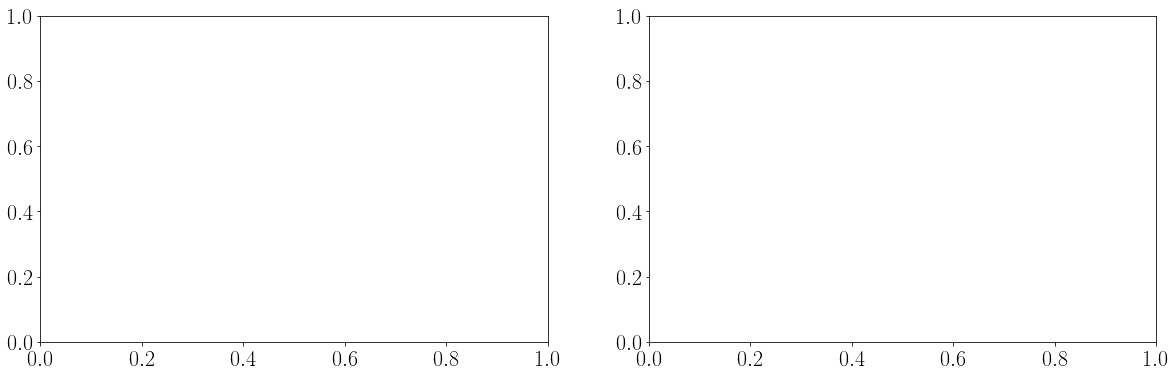

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(20,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax1.plot( X_0, F_0[:,0,0], X_0,F_0[:,0,1] + 80, X_0,F_0[:,0,2] + 115 ) 
ax2.plot( X_1, F_1[:,0,0], X_1,F_1[:,0,1] + 50, X_1,F_1[:,0,2] + 85 ) 

plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22) 

#ax1.set_ylim(-1.8,0.3)
ax1.set_ylim(0,180)
ax2.set_ylim(0,135)

ax1.set_xlim(-1.8,0)
ax2.set_xlim(-1.8,0)


ax2.yaxis.set_ticks(np.arange(0.0,130, 40))


ax1.set_xlabel(r'Energ\'ia ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')
ax2.set_xlabel(r'Energ\'ia ($Ry^*$)',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')

ax1.annotate('F = 0 \,\, kV/cm', xy=(130, 80), xycoords='figure points',fontsize=20)
ax1.annotate('F = 0.25 \,\, kV/cm ', xy=(130, 223), xycoords='figure points',fontsize=20)
ax1.annotate('F = 0.5 \,\, kV/cm ', xy=(130, 286), xycoords='figure points',fontsize=20)

ax2.annotate('F = 0 \,\, kV/cm', xy=(730, 78), xycoords='figure points',fontsize=20)
ax2.annotate('F = 0.25 \,\, kV/cm ', xy=(730, 199), xycoords='figure points',fontsize=20)
ax2.annotate('F = 0.5 \,\, kV/cm ', xy=(730, 286), xycoords='figure points',fontsize=20)


ax1.legend(["a = b = 2 \,($a_o^*$) \, \,  $S_D/S_F =0.2$ \quad $\\theta= 0$"], loc=(2),fontsize=18)
ax2.legend(["a = b = 1 \,($a_o^*$) \, \,  $S_D/S_F =0.2$ \quad $\\theta= 0$"], loc=(2),fontsize=18)

ax2.set_xlabel(r'Energ\'ia \, ($Ry^*$)' , labelpad=8,fontsize=24,fontweight='bold', horizontalalignment='center')           
ax1.set_xlabel(r'Energ\'ia \, ($Ry^*$)' , labelpad=8,fontsize=24,fontweight='bold', horizontalalignment='center')           
ax1.set_ylabel(r'Densidad de Estados',labelpad=8,fontsize=24,fontweight='bold', horizontalalignment ='center')     

#plt.savefig('Arc_DOS_SD.pdf',format='pdf', dpi=1000,bbox_inches="tight")

